# Título:
LIMPIEZA DE DATOS

### ANALISIS EXPLORATORIO DE LOS DATOS

En este apartado exploraremos los datos para poder observar sus características.

In [53]:
#importamos las librerias necesarias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
import numpy as np
import seaborn as sea


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

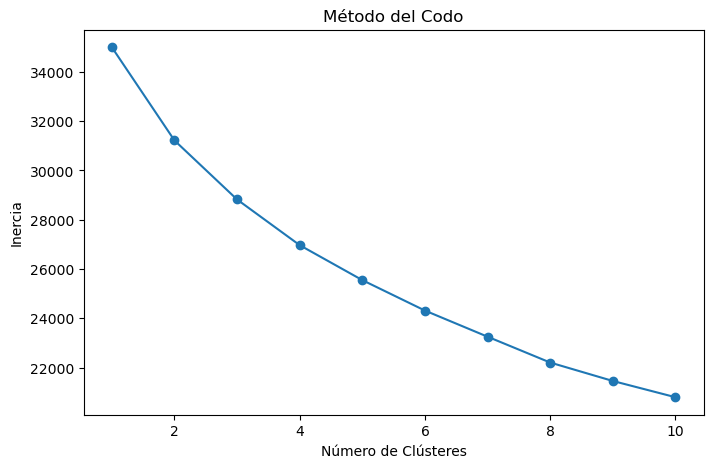

In [54]:
# Cargar el archivo CSV
file_path = "Impact_of_Remote_Work_on_Mental_Health 2.csv"
df = pd.read_csv(file_path)

# Normalización con StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()  # Copia el dataframe original
df_scaled[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(
    df[df.select_dtypes(include=['float64', 'int64']).columns]
)

# Manejo de Valores Extremos (IQR)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_value = q3 - q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


# Método del Codo para Selección de Clústeres
from sklearn.cluster import KMeans
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled[df.select_dtypes(include=['float64', 'int64']).columns])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


In [55]:
# Corregir inconsistencias en las columnas categóricas
def clean_text(value):
    if isinstance(value, str):
        return value.strip().capitalize()
    return value

df['Gender'] = df['Gender'].apply(lambda x: clean_text(x).replace("M", "Male").replace("F", "Female"))
df['Physical_Activity'] = df['Physical_Activity'].apply(lambda x: clean_text(x))
df['Productivity_Change'] = df['Productivity_Change'].apply(lambda x: clean_text(x).replace("No change", "No Change"))

# Manejo de Valores Extremos (IQR)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_value = q3 - q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])




In [56]:
# Crear categorías para niveles de estrés y aislamiento social
def categorize_stress_level(value):
    if value <= 2:
        return "Low"
    elif value <= 4:
        return "Medium"
    else:
        return "High"

df['Stress_Level_Category'] = df['Work_Life_Balance_Rating'].apply(categorize_stress_level)

def categorize_social_isolation(value):
    if value <= 2:
        return "Low"
    elif value <= 4:
        return "Medium"
    else:
        return "High"

df['Social_Isolation_Category'] = df['Social_Isolation_Rating'].apply(categorize_social_isolation)

# Manejo de Valores Extremos (IQR)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_value = q3 - q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])





In [57]:
# Eliminar filas duplicadas
df.drop_duplicates(inplace=True)

# Manejo de Valores Extremos (IQR)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_value = q3 - q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])





In [58]:
# Filtrar valores extremos en horas trabajadas por semana
q1 = df['Hours_Worked_Per_Week'].quantile(0.25)
q3 = df['Hours_Worked_Per_Week'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Hours_Worked_Per_Week'] >= lower_bound) & (df['Hours_Worked_Per_Week'] <= upper_bound)]



In [59]:
# Normalización de variables numéricas
scaler = StandardScaler()
variables_to_normalize = [
    "Hours_Worked_Per_Week",
    "Number_of_Virtual_Meetings",
    "Work_Life_Balance_Rating"
]
df_normalized = df.copy()
df_normalized[variables_to_normalize] = scaler.fit_transform(df[variables_to_normalize])


# Manejo de Valores Extremos (IQR)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_value = q3 - q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])





In [60]:
# Guardar el archivo limpio y transformado para Tableau
output_path = "Impact_of_Remote_Work_Cleaned.csv"
df.to_csv(output_path, index=False)

print("Archivo limpio y transformado guardado en:", output_path)

# Manejo de Valores Extremos (IQR)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_value = q3 - q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])




Archivo limpio y transformado guardado en: Impact_of_Remote_Work_Cleaned.csv


In [61]:


# Manejo de Valores Extremos (IQR)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_value = q3 - q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])





In [62]:


# Manejo de Valores Extremos (IQR)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_value = q3 - q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


